Plot the tuning curve of vgg_gender for different level morph face.

Now loading batch 1
Now loading batch 2
Now loading batch 3
Now loading batch 4
Now loading batch 5
Now loading batch 6
Now loading batch 7
Now loading batch 8
Now loading batch 9
Now loading batch 10
Now loading batch 11
Testing complete in 0m 5s


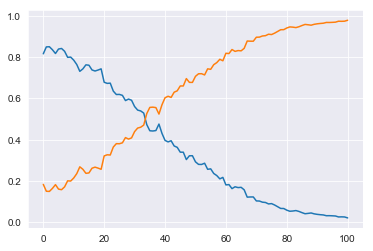

In [17]:
import numpy as np
import seaborn as sns

import torch
from torchvision import transforms
from dnnbrain.dnn.io import PicDataset, DataLoader
from cnnface.dnn.vgg_identity_recons import Vgg_identity
from cnnface.dnn.dnn_output import dnn_ouput
import matplotlib.pyplot as plt

#load model and data
vggid = Vgg_identity()
vggid.load_state_dict(torch.load('F:/Code/pretrained_model/vgg_emotion_CrossEntro.pth'))  # load model

imgcsv_path =  r'D:\cnnface\Emotion_analysis/morphface.csv'
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
PicSet = PicDataset(imgcsv_path, transform)
Picloader = DataLoader(PicSet, batch_size=10,shuffle=False)

# get activation
label, label_prob, dnn_act = dnn_ouput(Picloader,vggid)

sns.set_style('darkgrid')
x = np.arange(0,101,1)
y1 = label_prob[:,0]
y2= label_prob[:,1]
sns.lineplot(x=x,y=y1)
sns.lineplot(x=x,y=y2)
plt.show()

In [26]:
print(y1[30:40])
print(y1[34])
print(y2[34])

[0.5607421  0.54359186 0.5394952  0.5290848  0.4731296  0.44334537
 0.44220003 0.4443532  0.47579584 0.43039665]
0.4731296
0.52687037


In [2]:
from cnnface.stimulus.Image_processing import img_similarity,nor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:

baseimg = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray/frame001.png'))
imgs_name = os.listdir(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray')
imgs_path = [os.path.join(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray',name) for name in imgs_name]
imgs = [np.array(Image.open(path)) for path in imgs_path]
similarity = [img_similarity(baseimg, img, 'SSIM') for img in imgs]

sns.set_style('darkgrid')
bins = np.arange(0,101,1)
sns.lineplot(x=bins,y=similarity)
plt.show()

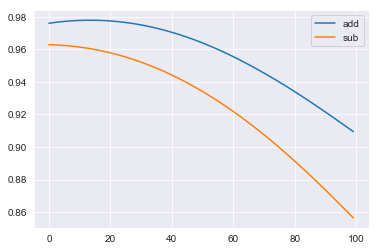

In [37]:
from cnnface.stimulus.noise_stimulus_generate import generateCI
sns.set_style('darkgrid')
female = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/female_average_face_gray_512.jpg').convert('L'))
male = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/male_average_face_gray_512.jpg').convert('L'))

bi = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/frame054_gray_512.jpg')).astype('int64')
para_ci = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\meta_data/paras_ci.npy')
ci = generateCI(para_ci)
scales = np.arange(0,100,1)

bi_add = [bi+ci*scale for scale in scales]
bi_sub = [bi-ci*scale for scale in scales]

simis_add = []
simis_sub = []
for i,_ in enumerate(bi_add):
    b_add = bi_add[i]
    b_add[b_add>255] = 255
    b_add[b_add<0] = 0
    
    
    b_sub = bi_sub[i] 
    b_sub[b_sub>255] = 255
    b_sub[b_sub<0] = 0
    
    addimg = Image.fromarray(nor(b_add)*200).convert('L')
    subimg = Image.fromarray(nor(b_sub)*200).convert('L')
    
    addimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale/ci_add_{}.jpg'.format(i))
    subimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale/ci_sub_{}.jpg'.format(i))
    
    simi_add = img_similarity(female,b_add,'pearson')
    simi_sub = img_similarity(male, b_sub, 'pearson')
    
    simis_add.append(simi_add)
    simis_sub.append(simi_sub)
    
scales = np.tile(scales,(2,))
simis = simis_add + simis_sub
add  =  ['add'] * 100
sub =  ['sub'] * 100
hue = add + sub
sns.lineplot(scales,simis,hue=hue)

In [45]:
barfsas = np.array(simis_add)
print(np.argwhere(barfsas==barfsas.max()))

[[13]]


32.86244414865491